# Exploratory Data Analysis for Black Friday Sales Data
### We Will look at:
* Exploring the Dataset
* Deriving sales insight to boost sales
* Graphically representing the findings
* Answering questions such as which product brings in more sales, what age group needs to be targeted for sales promotions, Stores in which areas make more sales during black friday

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/black-friday/train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
#drop User_ID and Product_ID
df = df.drop(['User_ID','Product_ID'], axis=1)

In [4]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
#missing data in %
missing_data_per= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, missing_data_per], axis=1, keys=['Total Missing Data', 'Missing Data %'])
missing_data.head(10)

,Total Missing Data,Missing Data %
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


In [6]:
# Product_Category_3 has more than 65% missing data - best to drop this column and impute another product category column
df = df.drop('Product_Category_3', axis=1)
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(pd.DataFrame(df['Product_Category_2']))
df['Product_Category_2'] = impute.transform(pd.DataFrame(df['Product_Category_2']))
df['Product_Category_2'] = np.round(df['Product_Category_2'])

In [7]:
#checking missing values
print("Missing Values:",df.isnull().sum().max())

Missing Values: 0


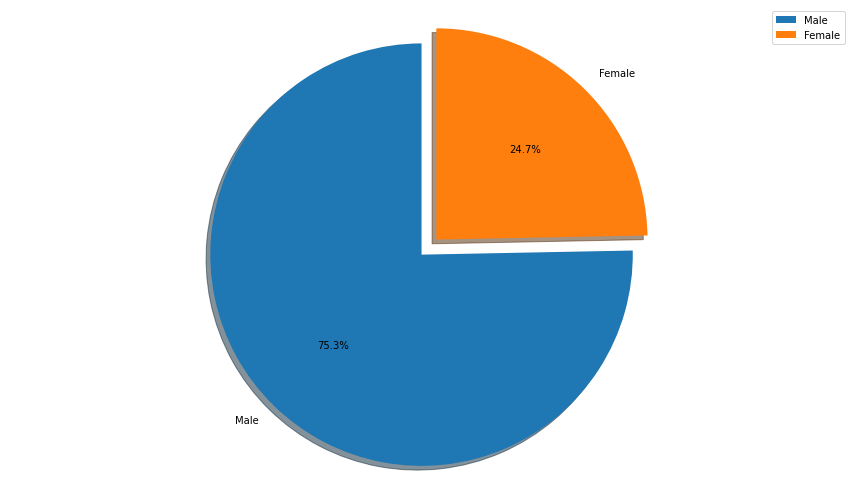

In [8]:
# Purchases made by male vs female during sales
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

* Looks like very less number of females purchased at the black friday sale
* It could also mean less number of females paid for the products
* Lets explore some more

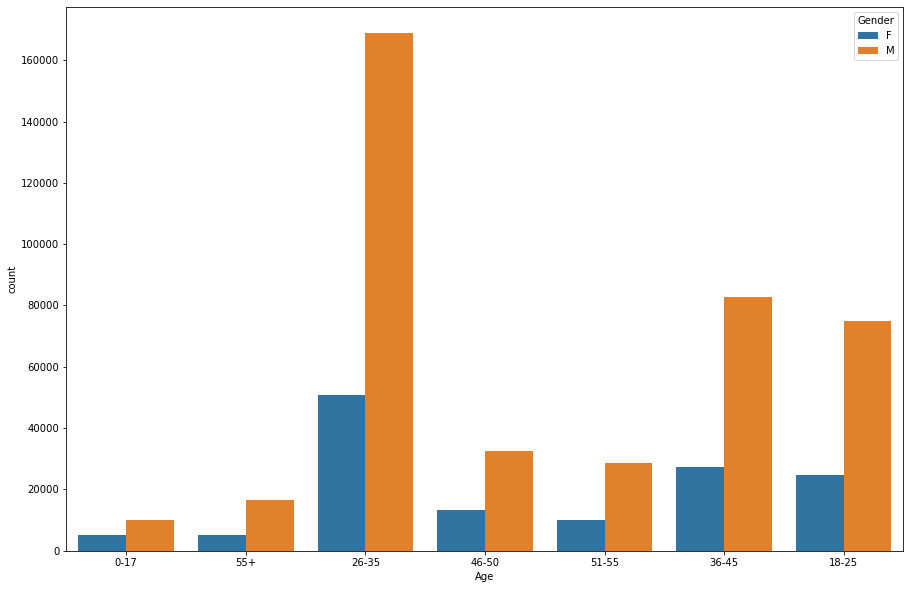

In [9]:
#age wise purchases done by gender during sale
fig1, ax1 = plt.subplots(figsize=(15,10))
sns.countplot(df['Age'],hue=df['Gender'])

* The plot shows that the age group between 26 and 35 years made more purchases than the others
* so we can boost sales targetting age group of 26-35 for specific products

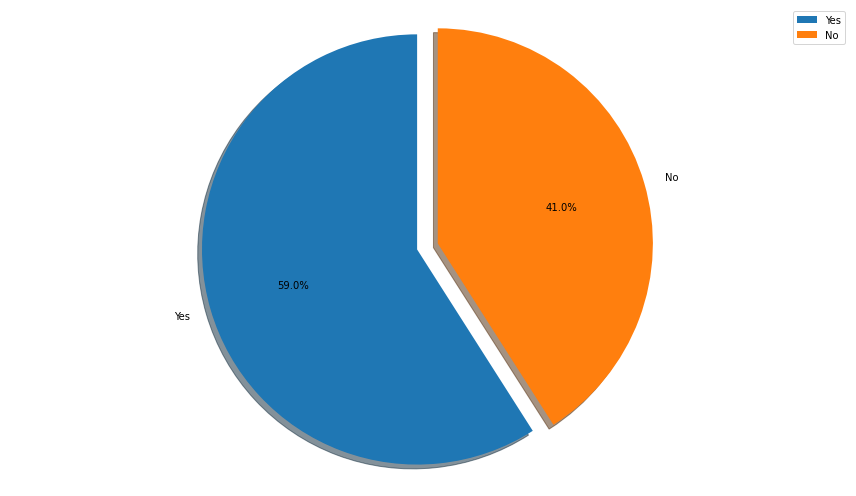

In [10]:
#data shows marital status of people who made purchases 
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Marital_Status'].value_counts(),explode=explode, labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

* This Data shows that the more than 50% of the customers are married, so we can come up with a strategy to target families to ensure more sales
* similarly target the non-married customers to boost sales in that category

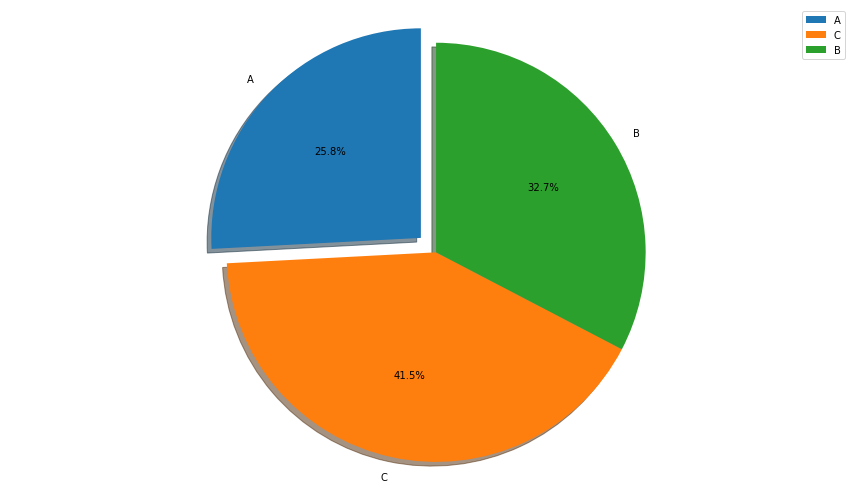

In [11]:
#purchases made according to people of particular region
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

* the above plot shows that people from Area C have made more purchases than Area A and Area B 
* Stores in Area A and B need to introduce more sales promotions compared to Area C but the results could also be affected by population/Age Group in the Area

In [12]:
for CityCategory in df['City_Category'].sort_values().unique():
    PurchaserCounts = df.loc[df['City_Category'] == CityCategory]
    print("Purchaser Counts for City:",CityCategory," = ",PurchaserCounts.shape[0])

Purchaser Counts for City: A  =  147720
Purchaser Counts for City: B  =  231173
Purchaser Counts for City: C  =  171175


* Lets look at which product makes more profit

In [13]:
Product_Category_1 = df['Product_Category_1'].sum()
Product_Category_2 = df['Product_Category_2'].sum()

print("Product Category 1 Profit = ",Product_Category_1)
print("Product Category 2 Profit = ",Product_Category_2)


Product Category 1 Profit =  2972716
Product Category 2 Profit =  5441328.0


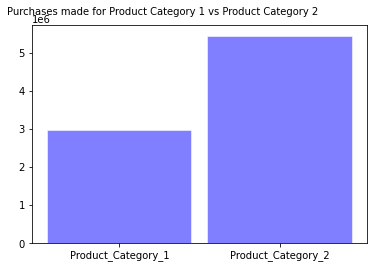

In [14]:
labels = ['Product_Category_1','Product_Category_2']
values = [Product_Category_1,Product_Category_2]

plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,6000000,'Purchases made for Product Category 1 vs Product Category 2')
         
plt.show()